In [40]:
print("iniciando")

iniciando


In [39]:
#Carregando as bilbiotecas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import google

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score #método para o cálculo do R2 (coeficiente de determinação)
import statsmodels.api as sm


In [41]:
#Lendo o arquivo
bicicletas = pd.read_csv("/content/drive/My Drive/Colab Notebooks/IGTI/mod1/desafio2/data/comp_bikes_mod.csv")
bicicletas.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1.0,NaN,1.0,0.0,1.0,0.0,0.0,6.0,0.0,1.0,NaN,0.2879,0.81,0.0,3.0,13.0,16.0
1,2.0,2011-01-01,1.0,0.0,1.0,1.0,0.0,6.0,0.0,NaN,0.22,0.2727,0.80,0.0,8.0,32.0,40.0
2,3.0,2011-01-01,1.0,0.0,1.0,2.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0,5.0,27.0,32.0
3,4.0,2011-01-01,1.0,0.0,1.0,3.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0,3.0,10.0,13.0
4,5.0,2011-01-01,1.0,0.0,1.0,4.0,0.0,6.0,NaN,1.0,0.24,0.2879,0.75,0.0,0.0,1.0,1.0


In [23]:
bicicletas.shape

(17379, 17)

In [24]:
bicicletas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     15641 non-null  float64
 1   dteday      15641 non-null  object 
 2   season      15641 non-null  float64
 3   yr          15641 non-null  float64
 4   mnth        15641 non-null  float64
 5   hr          15641 non-null  float64
 6   holiday     15641 non-null  float64
 7   weekday     15641 non-null  float64
 8   workingday  15641 non-null  float64
 9   weathersit  15641 non-null  float64
 10  temp        15641 non-null  float64
 11  atemp       15641 non-null  float64
 12  hum         15641 non-null  float64
 13  windspeed   15641 non-null  float64
 14  casual      15641 non-null  float64
 15  registered  15641 non-null  float64
 16  cnt         15641 non-null  float64
dtypes: float64(16), object(1)
memory usage: 2.3+ MB


In [25]:
 ## Proporção de valores nulos da coluna temp
 1 - (15641/17379)

0.1000057540710052

In [42]:
# Fazendo uma copia dos dados para um dataset que dteday não seja null.
bicicletas_dteday_not_null = bicicletas[bicicletas['dteday'].notna()]
bicicletas_dteday_not_null.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,14060.000000,14061.000000,14076.000000,14062.000000,14068.000000,14076.000000,14078.000000,14097.000000,14078.000000,14066.000000,14076.000000,14070.000000,14082.000000,14071.000000,14090.000000,14079.000000
mean,8679.717496,2.507930,0.501563,6.542810,11.486779,0.027707,3.006535,0.683053,1.422432,0.496926,0.476055,0.627357,0.189552,35.416317,153.280625,189.165850
std,5015.960092,1.110674,0.500015,3.443693,6.915101,0.164137,2.002829,0.465303,0.638937,0.192971,0.172827,0.192863,0.122309,48.770799,151.317869,181.223589
min,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4336.250000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8677.500000,3.000000,1.000000,7.000000,11.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.164200,17.000000,115.000000,142.000000
75%,13024.250000,3.000000,1.000000,10.000000,17.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,219.000000,280.000000
max,17376.000000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [43]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

bicicletas_dteday_not_null_label = bicicletas_dteday_not_null.copy()

bicicletas_dteday_not_null_label['season_original'] = bicicletas_dteday_not_null_label['season']
bicicletas_dteday_not_null_label['season'] =  pd.Categorical(bicicletas_dteday_not_null_label['season'])
## bicicletas_dteday_not_null_label['season'] = le.fit_transform(bicicletas_dteday_not_null_label['season'])
##bicicletas_dteday_not_null_label.head()
bicicletas_dteday_not_null_label['season'].describe()


count     14061.0
unique        4.0
top           3.0
freq       3623.0
Name: season, dtype: float64

In [28]:
bicicletas_dteday_not_null_label.tail()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_original
17373,17374.0,2012-12-31,1.0,1.0,12.0,18.0,0.0,1.0,1.0,2.0,0.26,NaN,0.48,0.1343,10.0,112.0,122.0,1.0
17374,17375.0,2012-12-31,NaN,1.0,12.0,19.0,0.0,1.0,1.0,2.0,0.26,0.2576,0.60,0.1642,11.0,108.0,119.0,NaN
17375,17376.0,2012-12-31,1.0,1.0,12.0,20.0,0.0,1.0,1.0,2.0,0.26,0.2576,0.60,0.1642,NaN,NaN,89.0,1.0
17377,NaN,2012-12-31,1.0,1.0,NaN,NaN,0.0,1.0,1.0,1.0,0.26,0.2727,0.56,0.1343,13.0,48.0,61.0,1.0
17378,NaN,2012-12-31,NaN,1.0,NaN,23.0,0.0,1.0,1.0,1.0,NaN,0.2727,0.65,0.1343,12.0,37.0,49.0,NaN


In [29]:

bicicletas_dteday_not_null_label.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15641 entries, 1 to 17378
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   instant          14060 non-null  float64 
 1   dteday           15641 non-null  object  
 2   season           14061 non-null  category
 3   yr               14076 non-null  float64 
 4   mnth             14062 non-null  float64 
 5   hr               14068 non-null  float64 
 6   holiday          14076 non-null  float64 
 7   weekday          14078 non-null  float64 
 8   workingday       14097 non-null  float64 
 9   weathersit       14078 non-null  float64 
 10  temp             14066 non-null  float64 
 11  atemp            14076 non-null  float64 
 12  hum              14070 non-null  float64 
 13  windspeed        14082 non-null  float64 
 14  casual           14071 non-null  float64 
 15  registered       14090 non-null  float64 
 16  cnt              14079 non-null  float64

In [44]:
bicicletas_dteday_not_null_label['dtedayOriginal'] = bicicletas_dteday_not_null_label['dteday']
bicicletas_dteday_not_null_label['dteday'] = pd.to_datetime(bicicletas_dteday_not_null_label['dteday'], format="%Y-%m-%d")
print(bicicletas_dteday_not_null_label.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 15641 entries, 1 to 17378
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   instant          14060 non-null  float64       
 1   dteday           15641 non-null  datetime64[ns]
 2   season           14061 non-null  category      
 3   yr               14076 non-null  float64       
 4   mnth             14062 non-null  float64       
 5   hr               14068 non-null  float64       
 6   holiday          14076 non-null  float64       
 7   weekday          14078 non-null  float64       
 8   workingday       14097 non-null  float64       
 9   weathersit       14078 non-null  float64       
 10  temp             14066 non-null  float64       
 11  atemp            14076 non-null  float64       
 12  hum              14070 non-null  float64       
 13  windspeed        14082 non-null  float64       
 14  casual           14071 non-null  float

In [45]:
bicicletas_dteday_not_null_label.tail()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_original,dtedayOriginal
17373,17374.0,2012-12-31,1.0,1.0,12.0,18.0,0.0,1.0,1.0,2.0,0.26,NaN,0.48,0.1343,10.0,112.0,122.0,1.0,2012-12-31
17374,17375.0,2012-12-31,NaN,1.0,12.0,19.0,0.0,1.0,1.0,2.0,0.26,0.2576,0.60,0.1642,11.0,108.0,119.0,NaN,2012-12-31
17375,17376.0,2012-12-31,1.0,1.0,12.0,20.0,0.0,1.0,1.0,2.0,0.26,0.2576,0.60,0.1642,NaN,NaN,89.0,1.0,2012-12-31
17377,NaN,2012-12-31,1.0,1.0,NaN,NaN,0.0,1.0,1.0,1.0,0.26,0.2727,0.56,0.1343,13.0,48.0,61.0,1.0,2012-12-31
17378,NaN,2012-12-31,NaN,1.0,NaN,23.0,0.0,1.0,1.0,1.0,NaN,0.2727,0.65,0.1343,12.0,37.0,49.0,NaN,2012-12-31


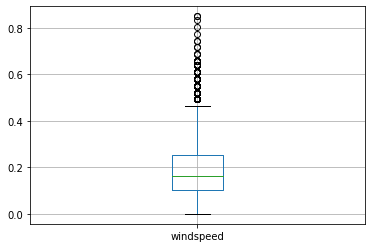

In [46]:
boxplot = bicicletas_dteday_not_null_label.boxplot(column=['windspeed'])

In [47]:
#Preenchendo hum, cnt e casual com valores médios
bicicletas_dteday_not_null_label2 = bicicletas_dteday_not_null_label.copy()
bicicletas_dteday_not_null_label2['hum'].fillna((bicicletas_dteday_not_null_label2['hum'].mean()), inplace=True)
bicicletas_dteday_not_null_label2['cnt'].fillna((bicicletas_dteday_not_null_label2['cnt'].mean()), inplace=True)
bicicletas_dteday_not_null_label2['casual'].fillna((bicicletas_dteday_not_null_label2['casual'].mean()), inplace=True)

In [48]:
print(bicicletas_dteday_not_null_label.info())
print(bicicletas_dteday_not_null_label.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15641 entries, 1 to 17378
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   instant          14060 non-null  float64       
 1   dteday           15641 non-null  datetime64[ns]
 2   season           14061 non-null  category      
 3   yr               14076 non-null  float64       
 4   mnth             14062 non-null  float64       
 5   hr               14068 non-null  float64       
 6   holiday          14076 non-null  float64       
 7   weekday          14078 non-null  float64       
 8   workingday       14097 non-null  float64       
 9   weathersit       14078 non-null  float64       
 10  temp             14066 non-null  float64       
 11  atemp            14076 non-null  float64       
 12  hum              14070 non-null  float64       
 13  windspeed        14082 non-null  float64       
 14  casual           14071 non-null  float

In [49]:
print(bicicletas_dteday_not_null_label2.info())
print(bicicletas_dteday_not_null_label2.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15641 entries, 1 to 17378
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   instant          14060 non-null  float64       
 1   dteday           15641 non-null  datetime64[ns]
 2   season           14061 non-null  category      
 3   yr               14076 non-null  float64       
 4   mnth             14062 non-null  float64       
 5   hr               14068 non-null  float64       
 6   holiday          14076 non-null  float64       
 7   weekday          14078 non-null  float64       
 8   workingday       14097 non-null  float64       
 9   weathersit       14078 non-null  float64       
 10  temp             14066 non-null  float64       
 11  atemp            14076 non-null  float64       
 12  hum              15641 non-null  float64       
 13  windspeed        14082 non-null  float64       
 14  casual           15641 non-null  float

In [50]:
# Usando um regressão linear simples, na forma matricial AX + b = y
x = bicicletas_dteday_not_null_label2.iloc[:, [12,14]].values ## 'hum','casual'
y = bicicletas_dteday_not_null_label2.iloc[:, 16].values ## 'cnt'
print("Valor X : ",x)
print("Valor Y : ",y)
# criando e treinando o modelo
model = LinearRegression()
model.fit(x, y)
# para visualizar os coeficientes encontrados
print("Coeficientes [a1,a2] : ", model.coef_)
print("Coeficiente b : ", model.intercept_)
previsao = model.predict(x)
# para visualizar o R²
R_2 = r2_score(y, previsao)  #realiza o cálculo do R2
# mostrando as previsões para o mesmo conjunto passado
print("R^2 : ",R_2)

Valor X :  [[ 0.8         8.        ]
 [ 0.8         5.        ]
 [ 0.75        3.        ]
 ...
 [ 0.6        35.41631725]
 [ 0.56       13.        ]
 [ 0.65       12.        ]]
Valor Y :  [40. 32. 13. ... 89. 61. 49.]
Coeficientes [a1,a2] :  [-99.75012328   2.21512197]
Coeficiente b :  173.29337505135578
R^2 :  0.4059859251122173


Correlação
           hum       cnt
hum  1.000000 -0.292472
cnt -0.292472  1.000000


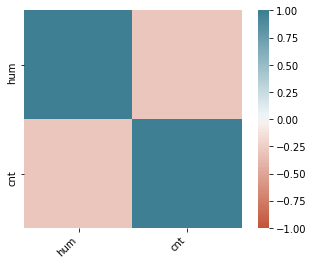

In [51]:
## Mede a correção entre variáveis, neste caso, hum e cnt.
import seaborn as sns

data = bicicletas_dteday_not_null_label2.iloc[:, [12,16]] ## "hum" e "cnt"
# Correlação entre as variáveis:
corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

ax.plot()
print("Correlação\n", corr)


In [54]:
from sklearn.tree import DecisionTreeRegressor

model_tree = DecisionTreeRegressor()

model_tree.fit(x, y)
model_tree.score(x, y)
print(model_tree)
#Prevê o resultado
previsao = model_tree.predict(x)
# para visualizar o R²
R_2 = r2_score(y, previsao)  #realiza o cálculo do R2
print(R_2)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')
0.7098339715834964
